In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Aegis - DL/Portfolio Project/voice.csv')
data.head(20)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## LABELENCODER

In [ ]:
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

In [ ]:
data['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [ ]:
data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## Data Spliting

In [ ]:
y = data['label']
X = data.drop('label', axis=1)

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Modeling

In [ ]:
X.shape


(3168, 20)

In [ ]:
X.shape[1]

20

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],)) #shape of single feature vector

#  2 hidden layer
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

# Output Layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es=EarlyStopping(patience=5)

In [ ]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[es])

Epoch 1/50
70/70 [==============================] - 1s 5ms/step - loss: 0.2844 - accuracy: 0.9134 - val_loss: 0.1333 - val_accuracy: 0.9674
Epoch 2/50
70/70 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9684 - val_loss: 0.0812 - val_accuracy: 0.9737
Epoch 3/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9729 - val_loss: 0.0737 - val_accuracy: 0.9748
Epoch 4/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9779 - val_loss: 0.0910 - val_accuracy: 0.9664
Epoch 5/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9797 - val_loss: 0.0665 - val_accuracy: 0.9800
Epoch 6/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9811 - val_loss: 0.0663 - val_accuracy: 0.9779
Epoch 7/50
70/70 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9820 - val_loss: 0.0639 - val_accuracy: 0.9790
Epoch 8/50
70/70 [==

In [ ]:
model.evaluate(X_test, y_test)


30/30 [==============================] - 0s 984us/step - loss: 0.0629 - accuracy: 0.9832


[0.06293901801109314, 0.9831755757331848]

## Using 2D CNN

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


In [ ]:
X.shape

(3168, 20)

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')

<ipython-input-46-a2ef5d435fb6>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')


In [ ]:
X

array([[-4.04924806,  0.4273553 , -4.22490077, ...,  0.        ,
         0.        ,  0.        ],
       [-3.84105325,  0.6116695 , -3.99929342, ...,  0.        ,
         0.        ,  0.        ],
       [-3.46306647,  1.60384791, -4.09585052, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2452018 ,  2.012196  , -0.01772849, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51474626,  2.14765111, -0.07087873, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,0.0,0.0,0.0,0.0,0.0
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,0.0,0.0,0.0,0.0,0.0
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,0.0,0.0,0.0,0.0,0.0
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,0.0,0.0,0.0,0.0,0.0
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-0.221660,-0.708404,0.124154,0.136933,0.289046,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,0.0,0.0,0.0,0.0,0.0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,0.153573,-0.214641,-0.388453,-0.384717,0.871981,0.0,0.0,0.0,0.0,0.0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,0.0,0.0,0.0,0.0,0.0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

In [ ]:
X.shape

(3168, 5, 5, 1)

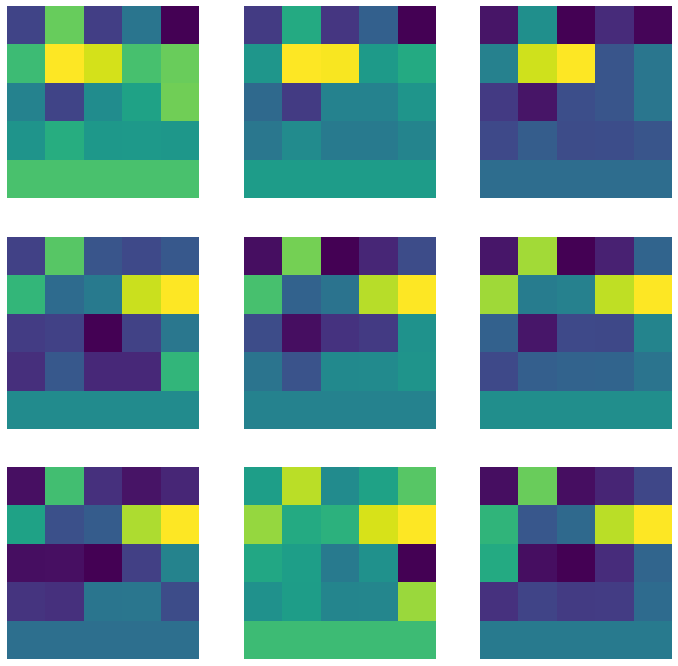

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(X[i]))
    plt.axis('off')
    
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

# CNN Layer
x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
# Pooling Layer
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

#Flatten before sending to ANN
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0   

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 2s 8ms/step - loss: 0.6167 - accuracy: 0.7140 - val_loss: 0.5523 - val_accuracy: 0.8131
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.8438 - val_loss: 0.4181 - val_accuracy: 0.8626
Epoch 3/100
56/56 [==============================] - 0s 5ms/step - loss: 0.3723 - accuracy: 0.8900 - val_loss: 0.3181 - val_accuracy: 0.8919
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.9075 - val_loss: 0.2556 - val_accuracy: 0.9054
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 0.9227 - val_loss: 0.2432 - val_accuracy: 0.8896
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9227 - val_loss: 0.1970 - val_accuracy: 0.9189
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1914 - accuracy: 0.9289 - val_loss: 0.1721 - val_accuracy: 0.9369
Epoch 8/100
5

In [ ]:
model.evaluate(X_test, y_test)


30/30 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9527


[0.13055264949798584, 0.9526813626289368]